<a href="https://colab.research.google.com/github/cecellhax/Analise_com_pycaret/blob/main/Modelo_de_regre%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [48]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [49]:
from pycaret.datasets import get_data
dados = get_data("insurance")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
!pip install sweetviz

In [51]:
import sweetviz

In [52]:
eda = sweetviz.analyze(dados)
eda.show_html(filepath = 'Relatório_Geral_Dos_Dados.html')

eda2 = sweetviz.compare_intra(dados, dados['smoker'] == 'yes', ['Fumante', 'Não fumante'])
eda2.show_html(filepath = 'Relatório_Fumantes.html')


Report Relatório_Geral_Dos_Dados.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



Report Relatório_Fumantes.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [53]:
!pip install IPython

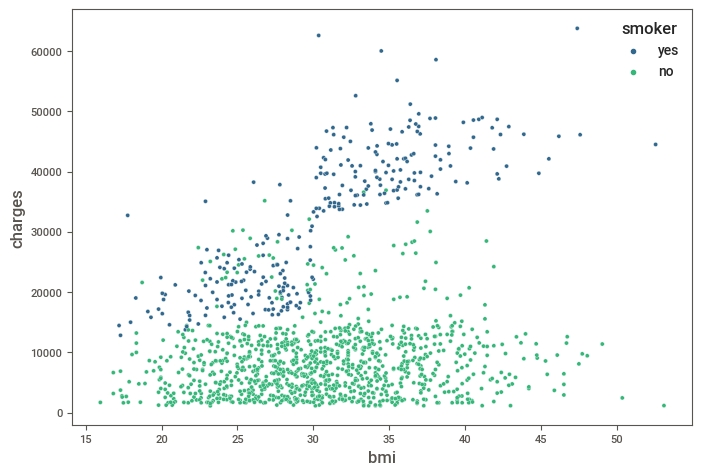

In [54]:
import IPython
import seaborn as sns

# Custos e Indice de massa corporea(IMC) de fumantes e não fumantes
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados, palette = 'viridis');

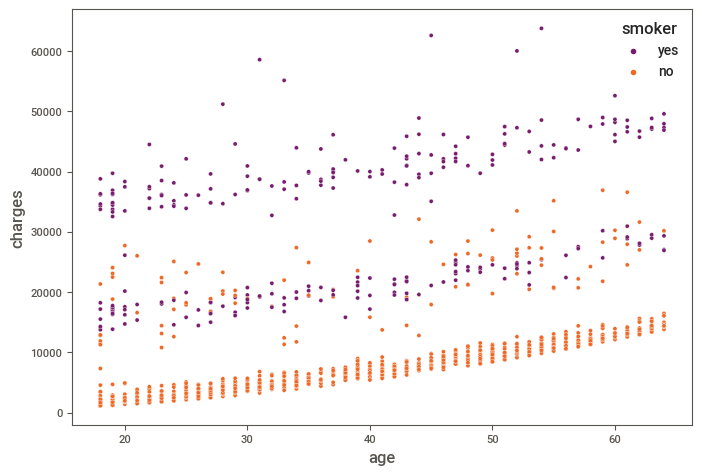

In [55]:
# Idade e custo de seguro de fumante e não fumantes
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = dados, palette = 'inferno');

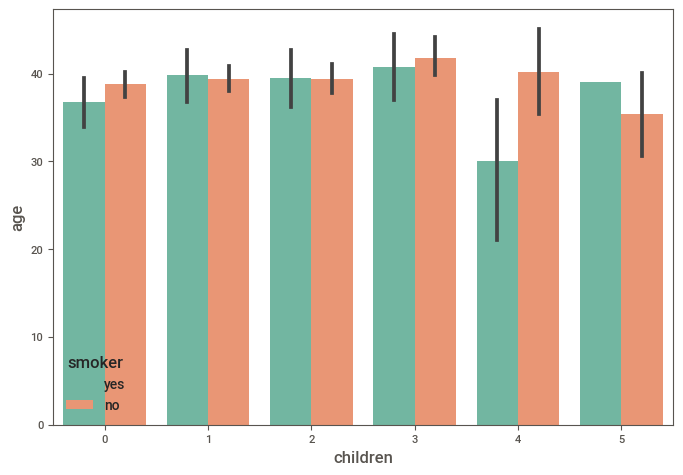

In [56]:
# Idade e quntidade de filhos de fumantes e não fumantes
sns.barplot(x = 'children', y = 'age', hue = 'smoker', data = dados, palette = 'Set2');

**Machine Learning com Pycaret.**
**Objetivo primário: Um modelo para previsão de custos para planos de saúde específicos.**

In [57]:
from pycaret.regression import *

In [58]:
regressao = setup(data = dados, 
                  target = 'charges', 
                  normalize = True,
                  combine_rare_levels = True, 
                  remove_outliers = True,
                  session_id = 1)

,Description,Value
0,session_id,1
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(889, 12)"


In [59]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [60]:
floresta = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3065.8718,3.410690e+07,5840.1113,0.7570,0.5776,0.2456
1,2942.7974,2.453240e+07,4953.0192,0.8183,0.5449,0.3843
2,1887.0997,1.072326e+07,3274.6397,0.8990,0.4367,0.4087
3,3451.8831,2.988716e+07,5466.9152,0.7851,0.5286,0.4453
4,3129.8362,2.904193e+07,5389.0566,0.7399,0.5266,0.3780
5,2444.9832,1.858563e+07,4311.1050,0.8608,0.3952,0.2622
6,2873.0122,2.437362e+07,4936.9651,0.8232,0.5056,0.3708
7,3048.1831,3.200634e+07,5657.4143,0.7605,0.4838,0.3586
8,2703.9166,2.434650e+07,4934.2169,0.8649,0.5006,0.3070
9,2991.1387,2.284806e+07,4779.9642,0.8724,0.5506,0.5570


In [61]:
# tunando a floresta
floresta_tunada = tune_model(floresta, optimize = 'MAPE', n_iter = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2696.4318,3.329798e+07,5770.4400,0.7628,0.5702,0.1859
1,2059.5067,2.166329e+07,4654.3843,0.8396,0.4584,0.1522
2,741.1999,5.263039e+06,2294.1314,0.9504,0.1833,0.1074
3,2289.6780,2.389938e+07,4888.6992,0.8281,0.4241,0.1961
4,2159.5583,2.590000e+07,5089.2045,0.7680,0.4466,0.1532
5,1956.6747,1.905930e+07,4365.6962,0.8572,0.3877,0.1323
6,1687.1545,1.634743e+07,4043.1951,0.8814,0.3570,0.1429
7,2357.3341,3.268202e+07,5716.8190,0.7554,0.4302,0.1489
8,1992.6189,2.684985e+07,5181.6844,0.8510,0.5183,0.1357
9,1376.5790,1.358980e+07,3686.4346,0.9241,0.2701,0.1264


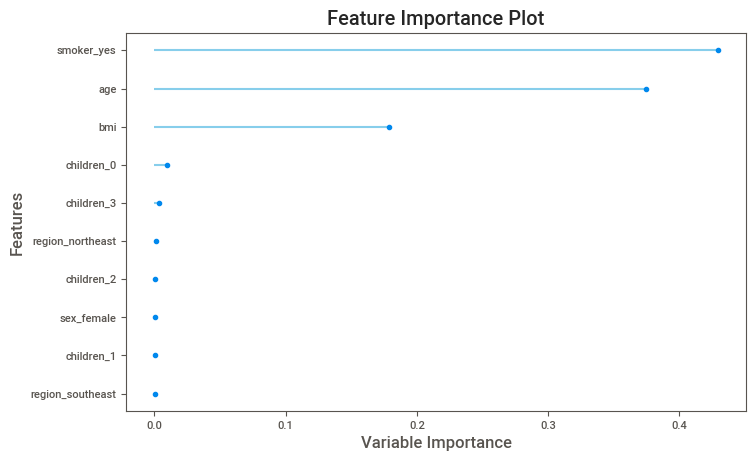

In [62]:
# importancia das variaveis analisadas
plot_model(floresta_tunada, plot = 'feature')

In [63]:
modelos = compare_models(sort = 'RMSLE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2618.5105,2.193915e+07,4620.8009,0.8411,0.4538,0.3272,0.085
huber,Huber Regressor,3265.7950,4.565352e+07,6709.2974,0.6664,0.4712,0.2083,0.030
par,Passive Aggressive Regressor,3336.9808,4.546264e+07,6692.3543,0.6682,0.4780,0.2061,0.063
catboost,CatBoost Regressor,2774.6317,2.353584e+07,4804.2591,0.8287,0.4798,0.3448,1.081
rf,Random Forest Regressor,2853.8722,2.504518e+07,4954.3408,0.8181,0.5050,0.3717,0.560
et,Extra Trees Regressor,2807.6434,2.814747e+07,5262.9452,0.7960,0.5151,0.3584,0.500
llar,Lasso Least Angle Regression,4073.6880,3.619572e+07,5980.3385,0.7386,0.5516,0.4146,0.015
br,Bayesian Ridge,4084.1088,3.618358e+07,5978.8591,0.7388,0.5565,0.4161,0.014
ridge,Ridge Regression,4090.1058,3.618379e+07,5978.8550,0.7388,0.5570,0.4173,0.014
lasso,Lasso Regression,4074.6998,3.618339e+07,5978.9157,0.7387,0.5596,0.4143,0.017


In [64]:
modelos_tunados = [tune_model(i, optimize = 'RMSLE') for i in modelos]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4196.8841,6.306728e+07,7941.4907,0.5507,0.7010,0.2317
1,3750.8492,4.273829e+07,6537.4527,0.6835,0.5233,0.2160
2,1887.5507,1.792047e+07,4233.2580,0.8312,0.3077,0.1452
3,4000.3528,5.059012e+07,7112.6732,0.6362,0.4549,0.2093
4,3267.9138,4.107405e+07,6408.9038,0.6321,0.4605,0.1716
5,3627.7139,4.551962e+07,6746.8232,0.6590,0.4259,0.1755
6,3414.5381,4.175031e+07,6461.4478,0.6972,0.3936,0.1747
7,3754.9913,4.764501e+07,6902.5365,0.6434,0.4577,0.1964
8,4083.5281,6.005739e+07,7749.6705,0.6667,0.5955,0.1800
9,3287.2665,4.996899e+07,7068.8747,0.7208,0.3753,0.1779


In [65]:
# Combinandos os 5 modelos em um único preditor
modelo_combinado = blend_models(modelos_tunados)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3635.7179,4.590827e+07,6775.5638,0.6729,0.6060,0.2245
1,3476.8221,3.220819e+07,5675.2261,0.7615,0.4721,0.2471
2,1832.9932,1.280609e+07,3578.5597,0.8794,0.2247,0.1737
3,3345.2484,3.251768e+07,5702.4275,0.7662,0.3970,0.2282
4,3089.5570,3.116229e+07,5582.3190,0.7209,0.4228,0.2091
5,2919.2452,2.654236e+07,5151.9275,0.8012,0.3745,0.1933
6,2972.1929,2.552879e+07,5052.6025,0.8149,0.3659,0.1988
7,3517.7957,3.676539e+07,6063.4466,0.7248,0.4033,0.2397
8,3292.4707,3.492515e+07,5909.7508,0.8062,0.5067,0.2199
9,2678.7955,2.617674e+07,5116.3214,0.8538,0.2999,0.2231


In [66]:
pred = predict_model(modelo_combinado)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,3158.2225,3.228906e+07,5682.346,0.7722,0.3887,0.2182


In [67]:
# aplicando o modelo final em todos os dados disponíveis
modelo_final = finalize_model(modelo_combinado)

In [71]:
# salvando o modelo
save_model(modelo_final, 'Meu-modelo-para-os-custos')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                     ('par',
                                                      PassiveAggressiveRegressor(C=0.297,
                                                                                 average=False,
                                                                  

In [74]:
# deploy
def CustoSeguro(age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('/content/Meu-modelo-para-os-custos')

    pred = float(predict_model(modelo, data = dados)['Label'].round(2))
    valor = round(1.8*pred, 2)
    
    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Fumante: {}'.format(smoker))
    print('Região: {}'.format(region))
    print(' ')
    print('Custo do Seguro: ${}'.format(pred))
    print('Valor de Venda: ${}'.format(valor))

CustoSeguro(age = 31, sex = 'male', bmi = 25, children = 0, smoker =  'yes', region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 31
Sexo: male
IMC: 25
Crianças: 0
Fumante: yes
Região: southwest
 
Custo do Seguro: $26531.69
Valor de Venda: $47757.04
